define the function to analyze behavioral file

In [9]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

def analyze_data(name, dict_path):
    # Load data
    filename = dict_path + name
    data = scipy.io.loadmat(filename)

    beh = data['beh'][0]
    beh_df = pd.DataFrame(beh)

    num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

    overall_cond = np.zeros(num_cond)
    correct_cond = np.zeros(num_cond)
    RT_cond = np.full((num_cond, 200), np.nan)

    for _, row in beh_df.iterrows():
        for i in range(1, num_cond + 1):  # MATLAB indices start from 1
            if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
                overall_cond[i-1] += 1  # Adjust for 0-based indexing

                if row['TrialError'] == 0:
                    correct_cond[i-1] += 1
                    RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

    mean_RT = np.nanmean(RT_cond, axis=1)
    cond_performance = correct_cond / overall_cond

    # Plotting Performance
    plt.figure()
    plt.bar(range(1, num_cond+1), cond_performance, color='lightgreen', label='Match trials')  # Changed color to lightgreen
    plt.xlabel('Conditions')
    plt.ylabel('Performance')
    plt.title('Performance ' + name)

    # Change color for specific bars to blue (if you still want to differentiate them)
    plt.bar(range(9, 17), cond_performance[8:16], color='blue', label='Nonmatch trials')
    plt.bar(range(25, 33), cond_performance[24:32], color='blue')  # Assuming there are at least 32 conditions
    # plt.bar(range(41, 49), cond_performance[40:48], color='blue')  # Assuming there are at least 32 conditions

    # Move legend outside the figure
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Calculate mean performance for different groups of bars
    mean_performance_1_8 = np.mean(cond_performance[:8])
    mean_performance_9_16 = np.mean(cond_performance[8:16])
    mean_performance_17_24 = np.mean(cond_performance[16:24])
    mean_performance_25_32 = np.mean(cond_performance[24:32])
    # mean_performance_33_40 = np.mean(cond_performance[32:40])
    # mean_performance_41_48 = np.mean(cond_performance[40:48])

    # Define the data
    # data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep', 'Nonmatch_4_rep', 'Match_4_rep'],
    #         'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32, mean_performance_33_40, mean_performance_41_48]}

    data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep'],
            'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32]}
    # Create a DataFrame
    df = pd.DataFrame(data)

    # Format the 'Mean Performance' column to have only two digits after the decimal point
    df['Mean Performance'] = df['Mean Performance'].apply(lambda x: f'{x:.2f}')

    print(df['Mean Performance'])

    # # Create a table
    # fig, ax = plt.subplots(figsize=(6, 1)) # Adjust the figsize as needed
    # ax.axis('tight')
    # ax.axis('off')
    # the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc = 'center')

    # # Set table properties
    # the_table.auto_set_font_size(False)
    # the_table.set_fontsize(12)
    # the_table.scale(1.2, 1.2) # Adjust the scaling as needed

    # plt.show()

    # # Plotting Reaction Time
    # plt.figure()
    # plt.bar(range(1, num_cond+1), mean_RT, color='lightgreen', label='Nonmatch trials')
    # plt.xlabel('Conditions')
    # plt.ylabel('Mean Reaction Time')
    # plt.title('Reaction Time ' + name)

    # # Move legend outside the figure
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # plt.xlim(0, 48)
    # plt.yticks(range(0, 601, 50))
    # plt.show()

    print('finished')



0    0.82
1    0.68
2    0.79
3    0.60
Name: Mean Performance, dtype: object
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


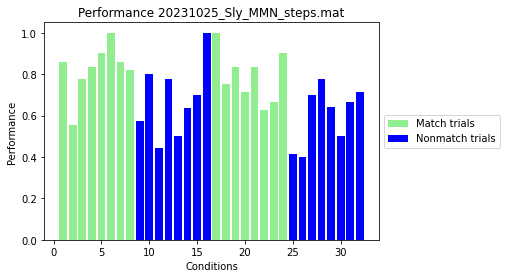

In [10]:
# Call the function
name = "20231025_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

0    0.88
1    0.55
2    0.89
3    0.57
Name: Mean Performance, dtype: object
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


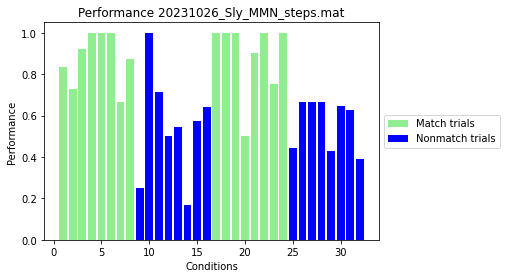

In [11]:
# Call the function
name = "20231026_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

0    0.82
1    0.58
2    0.96
3    0.51
Name: Mean Performance, dtype: object
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


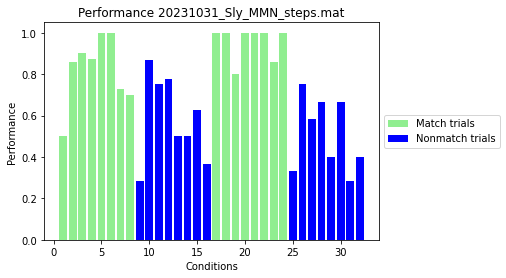

In [12]:
# Call the function
name = "20231031_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


0    0.84
1    0.80
2    0.85
3    0.58
Name: Mean Performance, dtype: object
finished


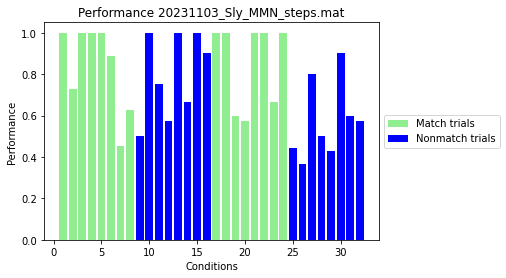

In [13]:
# Call the function
name = "20231103_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

0    0.69
1    0.79
2    0.83
3    0.74
Name: Mean Performance, dtype: object
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)
C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:30: RuntimeWarning: invalid value encountered in divide
  cond_performance = correct_cond / overall_cond


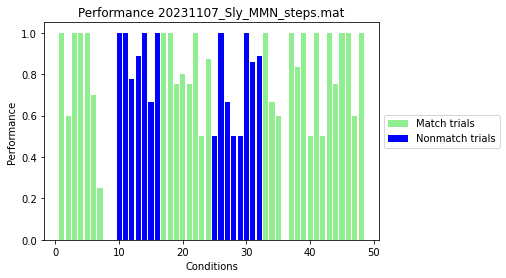

In [14]:
# Call the function
name = "20231107_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

0    0.79
1    0.58
2    0.83
3    0.48
Name: Mean Performance, dtype: object
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


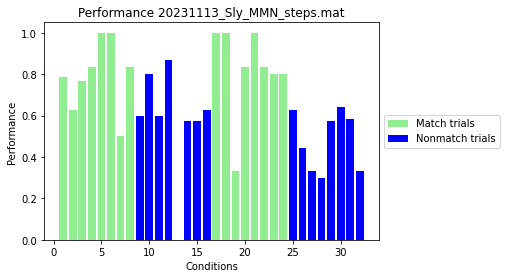

In [15]:
# Call the function
name = "20231113_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

0    0.81
1    0.77
2    0.89
3    0.50
Name: Mean Performance, dtype: object
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


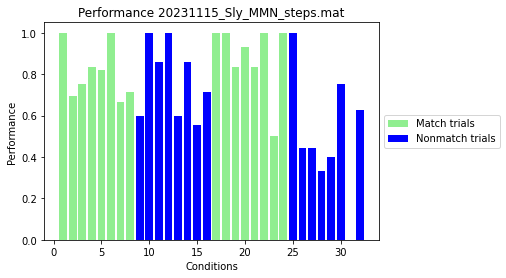

In [17]:
# Call the function
name = "20231115_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

0    0.55
1    0.91
2    0.73
3    0.82
Name: Mean Performance, dtype: object
finished


C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


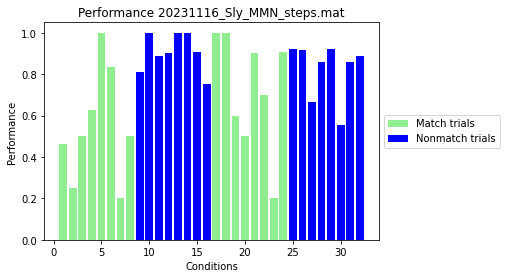

In [18]:
# Call the function
name = "20231116_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

C:\Users\Sihai\AppData\Local\Temp\ipykernel_47116\2694187050.py:29: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


0    0.56
1    0.83
2    0.76
3    0.79
Name: Mean Performance, dtype: object
finished


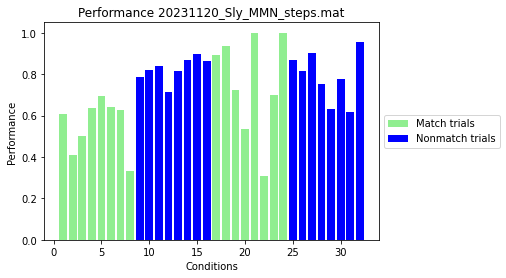

In [19]:
# Call the function
name = "20231120_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
analyze_data(name, dict_path)

In [ ]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load data
name = "20231107_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
filename = dict_path + name
data = scipy.io.loadmat(filename)

beh = data['beh'][0]
beh_df = pd.DataFrame(beh)

num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

overall_cond = np.zeros(num_cond)
correct_cond = np.zeros(num_cond)
RT_cond = np.full((num_cond, 200), np.nan)

for _, row in beh_df.iterrows():
    for i in range(1, num_cond + 1):  # MATLAB indices start from 1
        if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
            overall_cond[i-1] += 1  # Adjust for 0-based indexing

            if row['TrialError'] == 0:
                correct_cond[i-1] += 1
                RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

mean_RT = np.nanmean(RT_cond, axis=1)
cond_performance = correct_cond / overall_cond

# Plotting Performance
plt.figure()
plt.bar(range(1, num_cond+1), cond_performance, color='lightgreen', label='Match trials')  # Changed color to lightgreen
plt.xlabel('Conditions')
plt.ylabel('Performance')
plt.title('Performance ' + name)

# Change color for specific bars to blue (if you still want to differentiate them)
plt.bar(range(9, 17), cond_performance[8:16], color='blue', label='Nonmatch trials')
plt.bar(range(25, 33), cond_performance[24:32], color='blue')  # Assuming there are at least 32 conditions
plt.bar(range(41, 49), cond_performance[40:48], color='blue')  # Assuming there are at least 32 conditions

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Calculate mean performance for different groups of bars
mean_performance_1_8 = np.mean(cond_performance[:8])
mean_performance_9_16 = np.mean(cond_performance[8:16])
mean_performance_17_24 = np.mean(cond_performance[16:24])
mean_performance_25_32 = np.mean(cond_performance[24:32])
mean_performance_33_40 = np.mean(cond_performance[32:40])
mean_performance_41_48 = np.mean(cond_performance[40:48])

# Define the data
data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep', 'Nonmatch_4_rep', 'Match_4_rep'],
        'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32, mean_performance_33_40, mean_performance_41_48]}

# Create a DataFrame
df = pd.DataFrame(data)

# Format the 'Mean Performance' column to have only two digits after the decimal point
df['Mean Performance'] = df['Mean Performance'].apply(lambda x: f'{x:.2f}')

# Create a table
fig, ax = plt.subplots(figsize=(6, 1)) # Adjust the figsize as needed
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc = 'center')

# Set table properties
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2) # Adjust the scaling as needed

plt.show()

# Plotting Reaction Time
plt.figure()
plt.bar(range(1, num_cond+1), mean_RT, color='lightgreen', label='Nonmatch trials')
plt.xlabel('Conditions')
plt.ylabel('Mean Reaction Time')
plt.title('Reaction Time ' + name)

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 48)
plt.yticks(range(0, 601, 50))
plt.show()

print('finished')

C:\Users\Sihai\AppData\Local\Temp\ipykernel_50972\971664684.py:30: RuntimeWarning: Mean of empty slice
  mean_RT = np.nanmean(RT_cond, axis=1)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (0,).

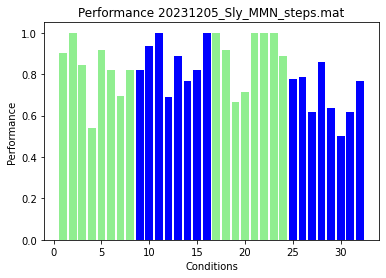

In [2]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt

# Load data
name = "20231205_Sly_MMN_steps.mat"
dict_path = r'D:\Uchi_data\Sly_beh\MMN_data\converted_data\\'
filename = dict_path + name
data = scipy.io.loadmat(filename)

beh = data['beh'][0]
beh_df = pd.DataFrame(beh)

num_cond = int(beh_df['Condition'].max())  # Ensure num_cond is an integer

overall_cond = np.zeros(num_cond)
correct_cond = np.zeros(num_cond)
RT_cond = np.full((num_cond, 200), np.nan)

for _, row in beh_df.iterrows():
    for i in range(1, num_cond + 1):  # MATLAB indices start from 1
        if row['Condition'] == i and (row['TrialError'] == 0 or row['TrialError'] == 8):
            overall_cond[i-1] += 1  # Adjust for 0-based indexing

            if row['TrialError'] == 0:
                correct_cond[i-1] += 1
                RT_cond[i-1, int(correct_cond[i-1])-1] = row['ReactionTime']

mean_RT = np.nanmean(RT_cond, axis=1)
cond_performance = correct_cond / overall_cond

# Plotting Performance
plt.figure()
plt.bar(range(1, num_cond+1), cond_performance, color='lightgreen', label='Match trials')  # Changed color to lightgreen
plt.xlabel('Conditions')
plt.ylabel('Performance')
plt.title('Performance ' + name)

# Change color for specific bars to blue (if you still want to differentiate them)
plt.bar(range(9, 17), cond_performance[8:16], color='blue', label='Nonmatch trials')
plt.bar(range(25, 33), cond_performance[24:32], color='blue')  # Assuming there are at least 32 conditions
plt.bar(range(41, 49), cond_performance[40:48], color='blue')  # Assuming there are at least 32 conditions

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Calculate mean performance for different groups of bars
mean_performance_1_8 = np.mean(cond_performance[:8])
mean_performance_9_16 = np.mean(cond_performance[8:16])
mean_performance_17_24 = np.mean(cond_performance[16:24])
mean_performance_25_32 = np.mean(cond_performance[24:32])
mean_performance_33_40 = np.mean(cond_performance[32:40])
mean_performance_41_48 = np.mean(cond_performance[40:48])

# Define the data
data = {'Group of Bars': ['Nonmatch_2_rep', 'Match_2_rep', 'Nonmatch_3_rep', 'Match_3_rep', 'Nonmatch_4_rep', 'Match_4_rep'],
        'Mean Performance': [mean_performance_1_8, mean_performance_9_16, mean_performance_17_24, mean_performance_25_32, mean_performance_33_40, mean_performance_41_48]}

# Create a DataFrame
df = pd.DataFrame(data)

# Format the 'Mean Performance' column to have only two digits after the decimal point
df['Mean Performance'] = df['Mean Performance'].apply(lambda x: f'{x:.2f}')

# Create a table
fig, ax = plt.subplots(figsize=(6, 1)) # Adjust the figsize as needed
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc = 'center')

# Set table properties
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.2) # Adjust the scaling as needed

plt.show()

# Plotting Reaction Time
plt.figure()
plt.bar(range(1, num_cond+1), mean_RT, color='lightgreen', label='Nonmatch trials')
plt.xlabel('Conditions')
plt.ylabel('Mean Reaction Time')
plt.title('Reaction Time ' + name)

# Move legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(0, 48)
plt.yticks(range(0, 601, 50))
plt.show()

print('finished')